(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


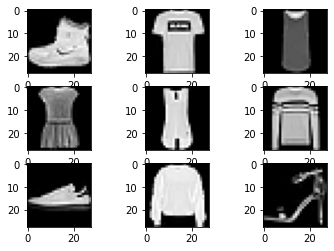

In [ ]:
# Import Libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import dropout

# Load data
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

# See dimensions of data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# See image
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()


In [ ]:
# Preprocessing
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
# Create model
model = Sequential()
model.add(Dense(512,activation = 'relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
#model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics = ['accuracy']) # bien dich
# Train model
history = model.fit(x_train,y_train,batch_size=64,epochs=50,verbose=1,validation_data=(x_test,y_test))


Epoch 1/100
938/938 [==============================] - 23s 24ms/step - loss: 0.5405 - accuracy: 0.8055 - val_loss: 0.4681 - val_accuracy: 0.8342
Epoch 2/100
938/938 [==============================] - 19s 20ms/step - loss: 0.4217 - accuracy: 0.8500 - val_loss: 0.4553 - val_accuracy: 0.8447
Epoch 3/100
938/938 [==============================] - 21s 22ms/step - loss: 0.4039 - accuracy: 0.8604 - val_loss: 0.4642 - val_accuracy: 0.8461
Epoch 4/100
938/938 [==============================] - 19s 20ms/step - loss: 0.3916 - accuracy: 0.8646 - val_loss: 0.4216 - val_accuracy: 0.8634
Epoch 5/100
938/938 [==============================] - 17s 18ms/step - loss: 0.3840 - accuracy: 0.8690 - val_loss: 0.4603 - val_accuracy: 0.8439
Epoch 6/100
938/938 [==============================] - 17s 19ms/step - loss: 0.3818 - accuracy: 0.8695 - val_loss: 0.4419 - val_accuracy: 0.8642
Epoch 7/100
938/938 [==============================] - 16s 17ms/step - loss: 0.3753 - accuracy: 0.8751 - val_loss: 0.4450 - val_ac

In [ ]:
# Results
score = model.evaluate(x_test,y_test, verbose=0)
print("Loss = ", score[0])
print("accuracy = ", score[1])

Loss =  1.4230036735534668
accuracy =  0.878000020980835


In [ ]:
# from sklearn import metrics
# # prediction
# y_pred = model.predict(x_test)
# # print accuracy
# print(metrics.accuracy_score(y_test, y_pred))

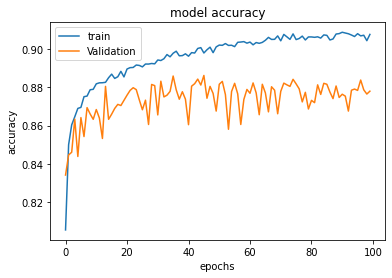

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()
